<a href="https://colab.research.google.com/github/Mohamed-Adel-l/Unsupervised-Learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt


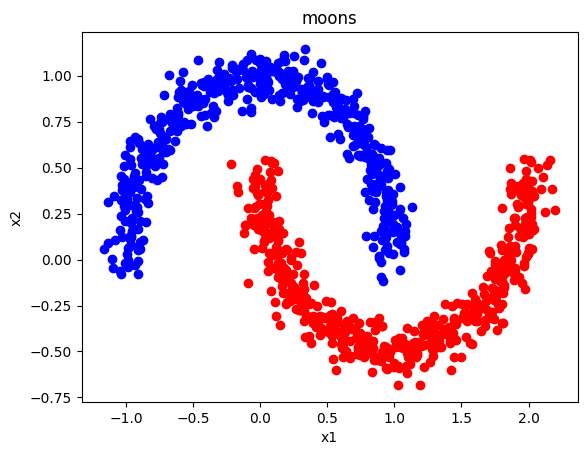

In [ ]:
X_moon,Y_moon= make_moons(n_samples=1000, noise=0.075, random_state=42)
plt.scatter(X_moon[Y_moon==0][:,0],X_moon[Y_moon==0][:,1],label=0,color="blue")
plt.scatter(X_moon[Y_moon==1][:,0],X_moon[Y_moon==1][:,1],label=1,color="red")
plt.title("moons")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

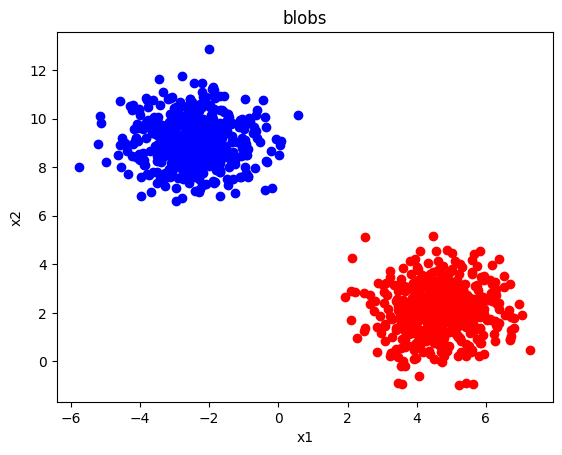

In [ ]:
X_blob,Y_blob= make_blobs(n_samples=1000,centers=2,random_state=42)
plt.scatter(X_blob[Y_blob==0][:,0],X_blob[Y_blob==0][:,1],label=0,color="blue")
plt.scatter(X_blob[Y_blob==1][:,0],X_blob[Y_blob==1][:,1],label=1,color="red")
plt.title("blobs")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

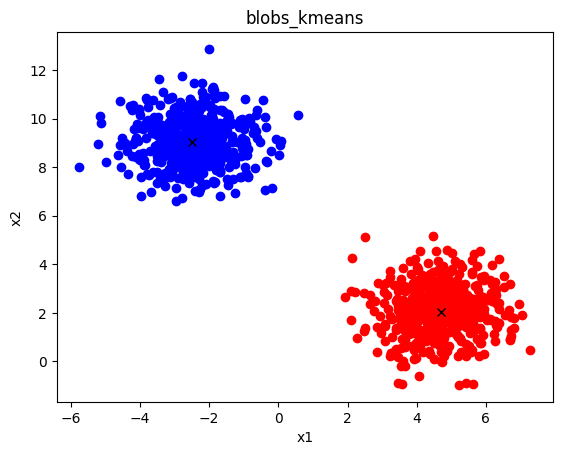

In [ ]:
model=KMeans(n_clusters=2,random_state=42)
model.fit(X_blob)
centers=model.labels_
plt.scatter(X_blob[centers==0][:,0],X_blob[centers==0][:,1],label=0,color="blue")
plt.scatter(X_blob[centers==1][:,0],X_blob[centers==1][:,1],label=1,color="red")
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],"kx")
plt.title("blobs_kmeans")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


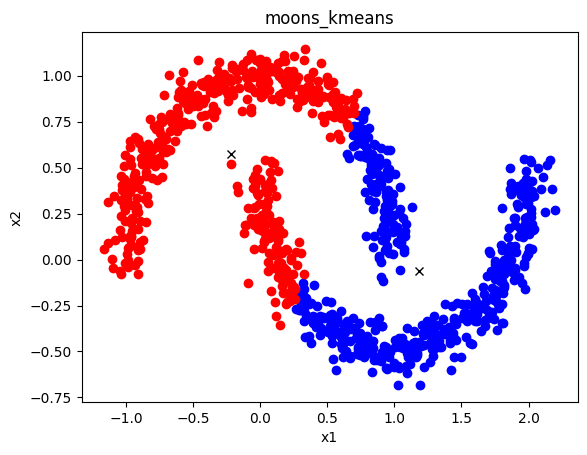

In [ ]:
model=KMeans(n_clusters=2,random_state=42)
model.fit(X_moon)
centers=model.labels_
plt.scatter(X_moon[centers==0][:,0],X_moon[centers==0][:,1],label=0,color="blue")
plt.scatter(X_moon[centers==1][:,0],X_moon[centers==1][:,1],label=1,color="red")
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],"kx")
plt.title("moons_kmeans")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

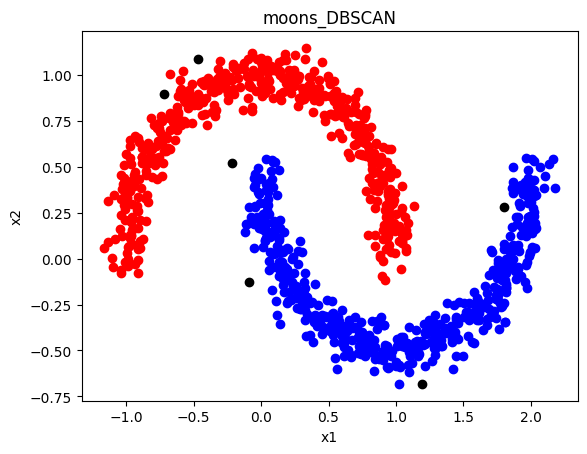

0.9801397266966284


In [ ]:
model=DBSCAN(eps=0.1,min_samples=2)
model.fit(X_moon)
centers=model.labels_
plt.scatter(X_moon[centers==0][:,0],X_moon[centers==0][:,1],label=0,color="blue")
plt.scatter(X_moon[centers==1][:,0],X_moon[centers==1][:,1],label=1,color="red")
plt.scatter(X_moon[centers==-1][:,0],X_moon[centers==-1][:,1],label=-1,color="black")
plt.title("moons_DBSCAN")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
score = adjusted_rand_score(Y_moon, model.labels_)
print(score)

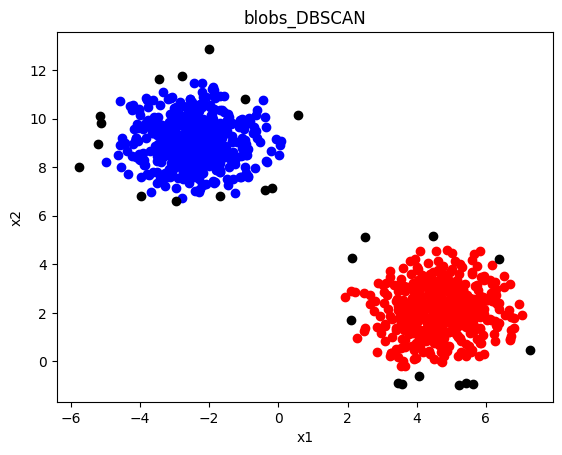

In [ ]:
model=DBSCAN(eps=0.5,min_samples=5)
model.fit(X_blob)
centers=model.labels_
plt.scatter(X_blob[centers==0][:,0],X_blob[centers==0][:,1],label=0,color="blue")
plt.scatter(X_blob[centers==1][:,0],X_blob[centers==1][:,1],label=1,color="red")
plt.scatter(X_blob[centers==-1][:,0],X_blob[centers==-1][:,1],label=-1,color="black")
plt.title("blobs_DBSCAN")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

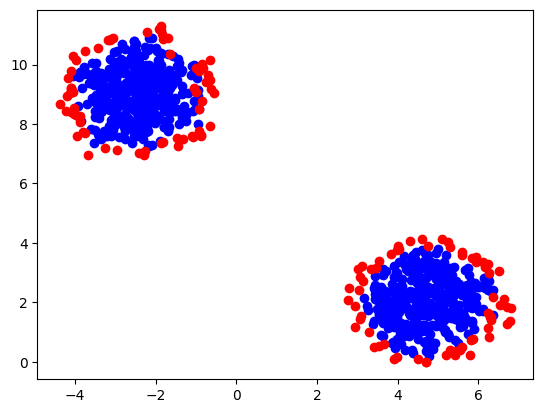

In [ ]:
model=KMeans(n_clusters=2,random_state=42)
model.fit(X_blob)
clusters=model.labels_
for cluster in np.unique(clusters):
  model=DBSCAN(eps=0.5,min_samples=15)#inc min to have a better border
  cluster_points = X_blob[clusters == cluster]
  model.fit_predict(cluster_points)
  labels=model.labels_
  cores_index=np.zeros_like(labels,dtype=bool)
  cores_index[model.core_sample_indices_]=True
  borders_index = (~cores_index) & (labels != -1)
  plt.scatter(cluster_points[cores_index][:,0],cluster_points[cores_index][:,1],color="blue",label="cores")
  plt.scatter(cluster_points[borders_index][:,0],cluster_points[borders_index][:,1],color="red",label="borders")
plt.show()

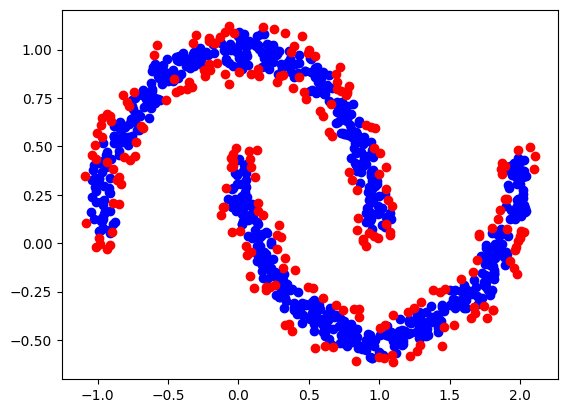

In [ ]:
model=KMeans(n_clusters=2,random_state=42) #kmeans then DBscan
model.fit(X_moon)
clusters=model.labels_
for cluster in np.unique(clusters):
  model=DBSCAN(eps=0.1,min_samples=15)
  cluster_points = X_moon[clusters == cluster]
  model.fit_predict(cluster_points)
  labels=model.labels_
  cores_index=np.zeros_like(labels,dtype=bool)
  cores_index[model.core_sample_indices_]=True
  borders_index = (~cores_index) & (labels != -1)
  plt.scatter(cluster_points[cores_index][:,0],cluster_points[cores_index][:,1],color="blue",label="cores")
  plt.scatter(cluster_points[borders_index][:,0],cluster_points[borders_index][:,1],color="red",label="borders")
plt.show()

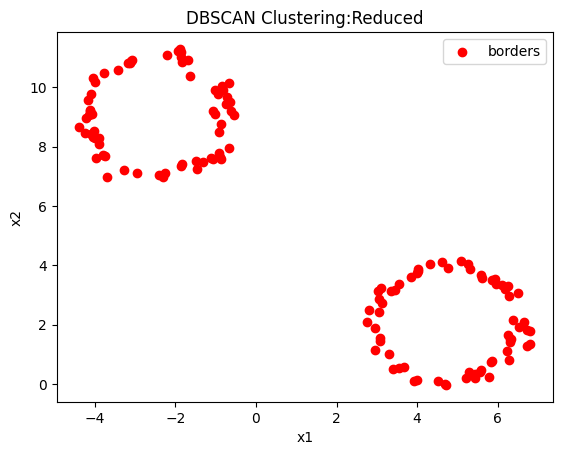

0.132


In [ ]:
model=DBSCAN(eps=0.5,min_samples=15)
model.fit(X_blob)
labels=model.labels_
cores_index=np.zeros_like(labels,dtype=bool)
cores_index[model.core_sample_indices_]=True
borders_index = (~cores_index) & (labels != -1)
Reduced=X_blob[borders_index][:,0:2]
plt.scatter(Reduced[:,0],Reduced[:,1],color="red",label="borders")
plt.title("DBSCAN Clustering:Reduced")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()
Reduced_ratio=Reduced.shape[0]/X_moon.shape[0]
print(Reduced_ratio)

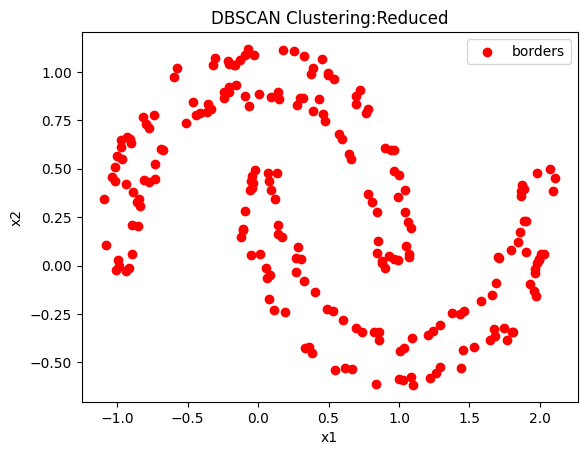

0.216


In [ ]:
model=DBSCAN(eps=0.1,min_samples=15)
model.fit(X_moon)
labels=model.labels_
cores_index=np.zeros_like(labels,dtype=bool)
cores_index[model.core_sample_indices_]=True
borders_index = (~cores_index) & (labels != -1)
Reduced=X_moon[borders_index][:,0:2]
plt.scatter(Reduced[:,0],Reduced[:,1],color="red",label="borders")
plt.title("DBSCAN Clustering:Reduced")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()
Reduced_ratio=Reduced.shape[0]/X_moon.shape[0]
print(Reduced_ratio)